In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional setting for better visuals
sns.set(style="whitegrid")

In [ ]:
# Load the dataset
df = pd.read_csv("data/autism_data.csv")

# Display first 5 rows
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
# Shape of dataset (rows, columns)
print("Dataset shape:", df.shape)

# Info summary (data types and missing values)
df.info()

# Quick statistics for numeric columns
df.describe()

Dataset shape: (800, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    obje

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [ ]:
# Count missing values in each column
df.isnull().sum()

# Check duplicates
df.duplicated().sum()

np.int64(0)

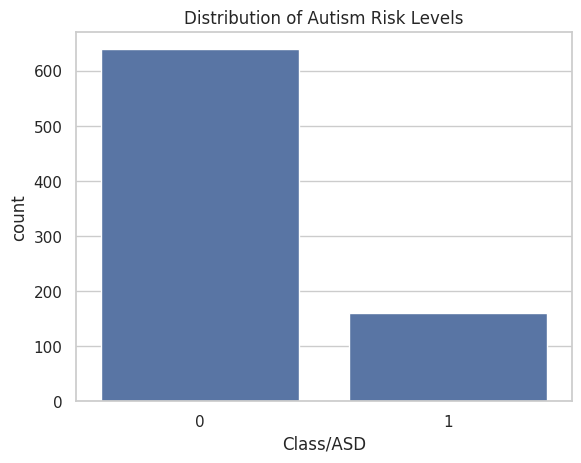

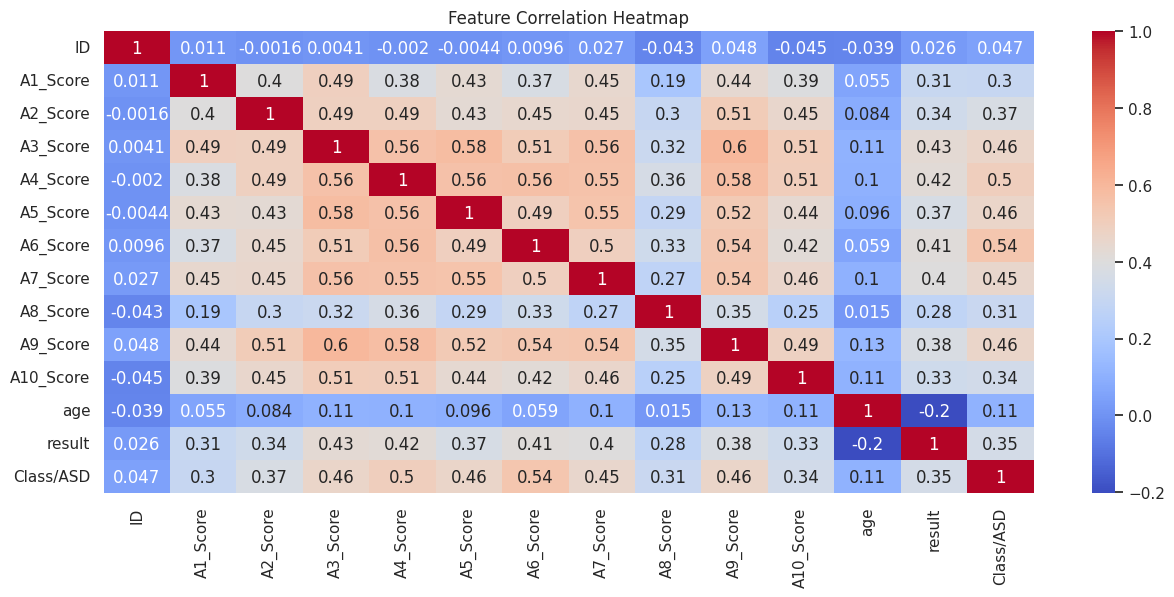

In [ ]:
# Example: countplot for target variable
sns.countplot(x='Class/ASD', data=df)
plt.title("Distribution of Autism Risk Levels")
plt.show()

# Example: correlation heatmap for numeric columns
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
df.drop(['ID', 'age_desc'], axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = ['gender', 'ethnicity', 'jaundice', 'austim',
            'contry_of_res', 'used_app_before', 'relation']

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['age', 'result']
X[num_cols] = scaler.fit_transform(X[num_cols])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (640, 19)
X_test shape: (160, 19)
y_train shape: (640,)
y_test shape: (160,)


**Model training and Evaluation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced')
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Support Vector Machine
svm_model = SVC(probability=True, class_weight='balanced')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)



--- Random Forest ---
Accuracy: 0.8375
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90       124
           1       0.67      0.56      0.61        36

    accuracy                           0.84       160
   macro avg       0.77      0.74      0.75       160
weighted avg       0.83      0.84      0.83       160



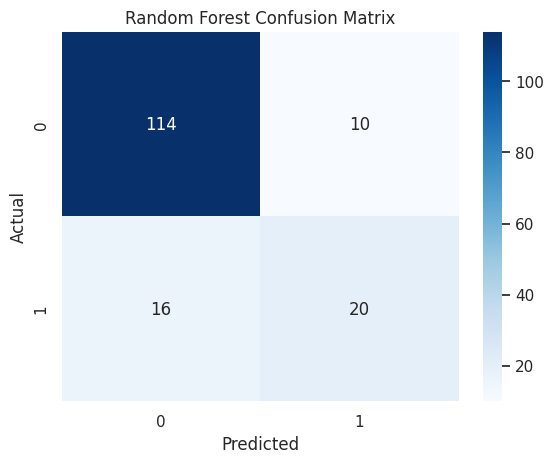


--- Logistic Regression ---
Accuracy: 0.825
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.81      0.88       124
           1       0.57      0.86      0.69        36

    accuracy                           0.82       160
   macro avg       0.76      0.84      0.78       160
weighted avg       0.87      0.82      0.84       160



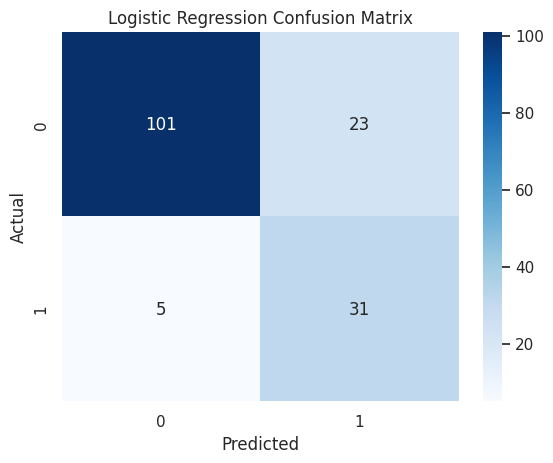


--- SVM ---
Accuracy: 0.78125
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.76      0.84       124
           1       0.51      0.86      0.64        36

    accuracy                           0.78       160
   macro avg       0.73      0.81      0.74       160
weighted avg       0.85      0.78      0.80       160



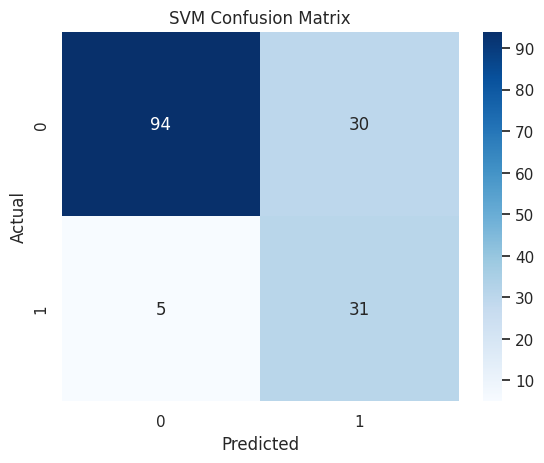

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Evaluate each model
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, svm_pred, "SVM")


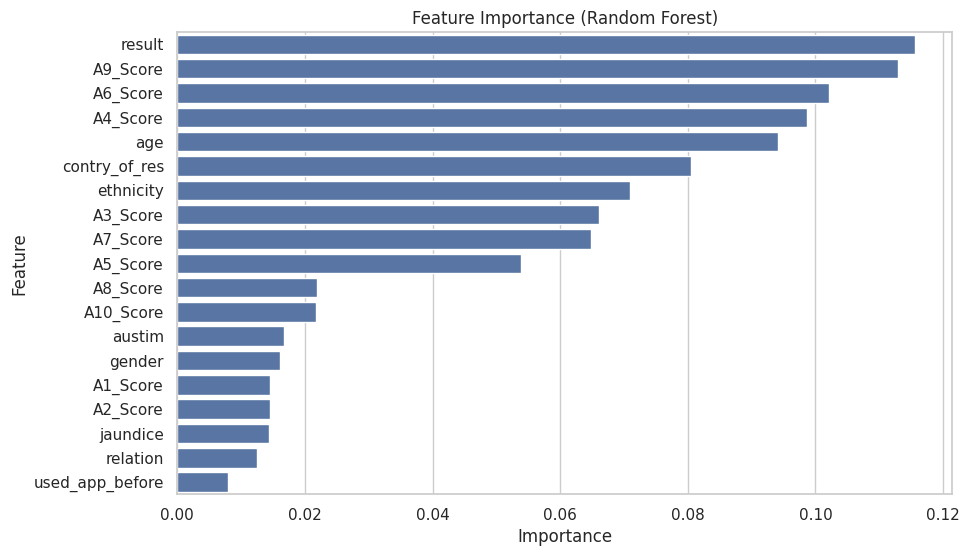

In [ ]:
importances = rf_model.feature_importances_
features = X_train.columns
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [ ]:
import os

# Create 'model' folder if it doesn't exist
os.makedirs("model", exist_ok=True)

# Now save the model
pickle.dump(rf_model, open("model/autism_model.pkl", "wb"))
print("Model saved as autism_model.pkl")

Model saved as autism_model.pkl
